# Data Science Challenge Task Three

This problem is a sequence transduction problem.


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# normalize per sample when you get the data initially

In [15]:
# loading data
import numpy as np

# features = np.load('drive/MyDrive/features.npy')
features = np.load('features.npy')
targets = np.load('target.npy')

print(f"features shape: {features.shape}\ntarget shape: {targets.shape}\n\n")
print(features[45])
print(targets[45])

features shape: (16117, 12, 500)
target shape: (16117, 75)


[[-0.00440467 -0.00387052 -0.0036176  ...  0.00226714  0.00193733
   0.00164015]
 [-0.00298815 -0.00273625 -0.00258574 ...  0.00506948  0.00472775
   0.00441726]
 [ 0.00141653  0.00113428  0.00103186 ...  0.00280234  0.00279042
   0.00277711]
 ...
 [-0.00194262 -0.00163849 -0.00150573 ... -0.00281408 -0.00284701
  -0.00287367]
 [-0.00095135 -0.00088797 -0.00084339 ...  0.00217922  0.00206312
   0.00195672]
 [-0.00066972 -0.00066334 -0.00064254 ...  0.00291269  0.00279022
   0.00267752]]
[54. 49. 43. 35. 31. 27. 39. 36. 32. 28. 24. 21. 35. 27. 29. 33. 36. 39.
 33. 28. 23. 43. 39. 36. 53. 50. 46. 13.  8. 19. 23. 31. 36. 27. 22. 18.
 25. 20. 14. 20. 16. 39. 12. 34. 31.  9. 41. 48. 34. 14. 18. 58. 54. 52.
 69. 65. 62. 47. 50. 62. 54.  9. 14. 20. 65. 68. 24. 31. 36. 19. 13.  9.
 37. 34. 30.]


In [16]:
#normalizing data - min-max normalization accross 12 channels for X and across all samples for y

# normalize_X/y normalizes the feature/target array and returns it alongside min and max vals per channel

def normalize_X(X):
    min_vals = X.min(axis=(0,2), keepdims=True)
    # print(min_vals.shape)
    max_vals = X.max(axis=(0,2), keepdims=True)
    # print(max_vals.shape)
    range_vals = max_vals - min_vals
    max_vals[max_vals == 0] = 1
    norm_features = np.divide(X, max_vals)
    return norm_features
    # , min_vals, max_vals

def normalize_y(y):
    min_vals = y.min(axis=0)
    max_vals = y.max(axis=0)
    range_vals = max_vals - min_vals
    norm_targets = np.divide(y, max_vals)
    return norm_targets
    # , min_vals, max_vals

# denormalize X/y denormalizes the array back into its original state so I can plot it using the functions they gave
def denormalize_X(norm_X, mins, maxs):
    range_vals = maxs - mins
    og_features = (norm_X * range_vals) + mins
    return og_features

def denormalize_y(norm_y, mins, maxs):
    range_vals = maxs-mins
    og_targets = (norm_y * range_vals) + mins
    return og_targets

# Verify Normalization/Denormalization works by plotting examples for both X and y

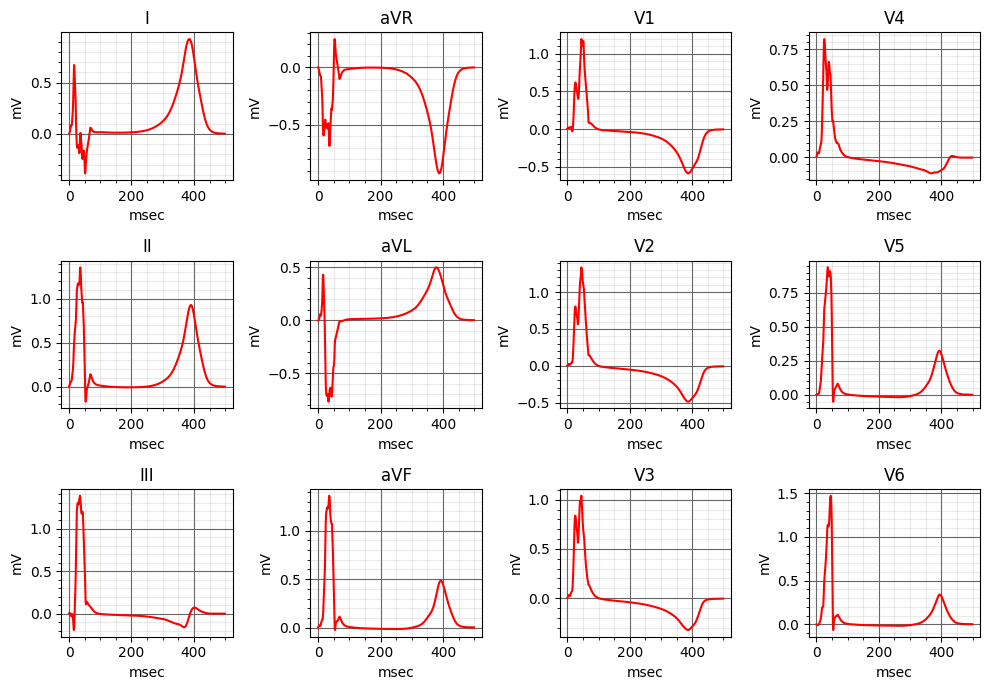

In [17]:
from matplotlib import pyplot as plt
test_idx = 50
X_clean = features[test_idx].T
# X_norm = norm_X[test_idx].T

row = 3
column = 4
num_timesteps = 500
plt.figure(figsize=(10, 7))
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
reorder = {1:1,2:5,3:9,4:2,5:6,6:10,7:3,8:7,9:11,10:4,11:8,12:12} # reorder the leads to standard 12-lead ECG display


for i in range(X_clean.shape[1]):
    plt.subplot(row, column, reorder[i + 1])
    plt.plot(X_clean[0:num_timesteps,i],'r')
    plt.title(titles[i])
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.xlabel('msec')
    plt.ylabel('mV')
plt.tight_layout()
plt.show()

In [18]:
    def train_test_split(X, y):
        # print(X[42])
        train_index = int(len(X) * .8)
        test_index = int(len(X) * .9)

        idxs = np.random.permutation(len(X))

        X = X[idxs]
        y = y[idxs]

        X_train = X[:train_index]
        y_train = y[:train_index]

        X_test = X[train_index:test_index]
        y_test = y[train_index:test_index]

        X_val = X[test_index:]
        y_val = y[test_index:]

        return X_train, y_train, X_test, y_test, X_val, y_val

In [19]:
X_train, y_train, X_test, y_test, X_val, y_val = train_test_split(features, targets)
# print(features.shape)

In [20]:
X_train_norm = normalize_X(X_train)
X_test_norm = normalize_X(X_test)
X_val_norm = normalize_X(X_val)

# y_train_norm = normalize_y(y_train)
# y_test_norm = normalize_y(y_test)
# y_val_norm = normalize_y(y_val)

In [21]:
print(f"training X shape{X_train_norm.shape}\ntesting X shape: {X_test_norm.shape}\nvalidating X shape{X_val_norm.shape}\n")
print(f"training y shape{y_train.shape}\ntesting y shape: {y_test.shape}\nvalidating y shape{y_val.shape}\n")

print(f"sum of X datasets equals number of samples: {X_train_norm.shape[0] + X_test_norm.shape[0] + X_val_norm.shape[0] == features.shape[0]}")
print(f"sum of y datasets equals number of samples: {y_train.shape[0] + y_test.shape[0] + y_val.shape[0] == targets.shape[0]}")

training X shape(12893, 12, 500)
testing X shape: (1612, 12, 500)
validating X shape(1612, 12, 500)

training y shape(12893, 75)
testing y shape: (1612, 75)
validating y shape(1612, 75)

sum of X datasets equals number of samples: True
sum of y datasets equals number of samples: True


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [23]:
class dataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
    def __len__(self):
        return len(self.features)
    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]
        feature = torch.tensor(feature, dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.float32)
        return feature, label

batch_size = 32

train_set = dataset(X_train_norm, y_train)
test_set = dataset(X_test_norm, y_test)
val_set = dataset(X_val_norm, y_val)

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size,shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True)

train_iter = iter(train_loader)
input, label = next(train_iter)
print(f"input shape: {input.shape}\nlabel shape: {label.shape}")

input shape: torch.Size([32, 12, 500])
label shape: torch.Size([32, 75])


In [24]:
#model class
class ECGNet(nn.Module):
    def __init__(self):
        super(ECGNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=12, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool1d(kernel_size=2,stride=2)
        self.batchnorm1 = nn.BatchNorm1d(32)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.batchnorm2 = nn.BatchNorm1d(64)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=128,kernel_size=5,stride=1, padding=2)
        self.batchnorm3 = nn.BatchNorm1d(128)
        self.pool3 = nn.MaxPool1d(kernel_size=4,stride=4)
        self.conv4 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=5, stride=1, padding=2)
        self.batchnorm4 = nn.BatchNorm1d(256)
        self.drop = nn.Dropout(p=.4)
        self.fc1 = nn.Linear(7936, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 128)
        self.fc4 = nn.Linear(128,75)

    def forward(self, x):
        x = self.pool(self.batchnorm1(F.relu(self.conv1(x))))
        x = self.pool2(self.batchnorm2(F.relu(self.conv2(x))))
        x = F.relu(self.batchnorm3((self.conv3(x))))
        x = self.pool3(self.batchnorm4(F.relu(self.conv4(x))))
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.drop(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        return x


model = ECGNet()

# Dummy data for forward pass
dummy_input = torch.randn(32, 12, 500)
print(model.forward(dummy_input).shape)


torch.Size([32, 75])


In [25]:
# !pip install torchinfo

In [26]:
from torchinfo import summary

summary(model,input=(12,500))

Layer (type:depth-idx)                   Param #
ECGNet                                   --
├─Conv1d: 1-1                            1,952
├─MaxPool1d: 1-2                         --
├─BatchNorm1d: 1-3                       64
├─Conv1d: 1-4                            10,304
├─BatchNorm1d: 1-5                       128
├─MaxPool1d: 1-6                         --
├─Conv1d: 1-7                            41,088
├─BatchNorm1d: 1-8                       256
├─MaxPool1d: 1-9                         --
├─Conv1d: 1-10                           164,096
├─BatchNorm1d: 1-11                      512
├─Dropout: 1-12                          --
├─Linear: 1-13                           8,127,488
├─Linear: 1-14                           524,800
├─Linear: 1-15                           65,664
├─Linear: 1-16                           9,675
Total params: 8,946,027
Trainable params: 8,946,027
Non-trainable params: 0

In [27]:
#training loop
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 100

# Check if CUDA is available and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)  # Move model to the device (GPU or CPU)

val_loss_arr = []
train_loss_arr = []
# Training loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for i, (inputs, labels) in enumerate(train_loader):
        # Move data to the appropriate device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()

        # Print batch-level loss
        if (i + 1) % 200 == 0:  # Print every 200 batches
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(train_loader)}], Loss: {loss.item():.5f}")


    # Print epoch-level training loss
    epoch_loss = running_loss / len(train_loader)
    train_loss_arr.append(epoch_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Average Training Loss: {epoch_loss:.5f}")

    # Validation Phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0

    with torch.no_grad():  # Disable gradient computation for validation
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to device
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()


    # Print epoch-level validation loss
    val_loss /= len(val_loader)
    val_loss_arr.append(val_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {val_loss:.5f}")

print("Training complete.")
# torch.save(model.state_dict(), 'model2_state.pth')

Epoch [1/100], Batch [200/403], Loss: 541.41260
Epoch [1/100], Batch [400/403], Loss: 455.15598
Epoch [1/100], Average Training Loss: 751.55920
Epoch [1/100], Validation Loss: 552.55857
Epoch [2/100], Batch [200/403], Loss: 553.14899
Epoch [2/100], Batch [400/403], Loss: 470.00192
Epoch [2/100], Average Training Loss: 516.09830
Epoch [2/100], Validation Loss: 468.75554
Epoch [3/100], Batch [200/403], Loss: 357.91611
Epoch [3/100], Batch [400/403], Loss: 261.44354
Epoch [3/100], Average Training Loss: 377.94200
Epoch [3/100], Validation Loss: 313.21512
Epoch [4/100], Batch [200/403], Loss: 333.36160
Epoch [4/100], Batch [400/403], Loss: 321.80588
Epoch [4/100], Average Training Loss: 307.57291
Epoch [4/100], Validation Loss: 288.36499
Epoch [5/100], Batch [200/403], Loss: 278.20331
Epoch [5/100], Batch [400/403], Loss: 306.33905
Epoch [5/100], Average Training Loss: 268.89595
Epoch [5/100], Validation Loss: 244.42365
Epoch [6/100], Batch [200/403], Loss: 260.61264
Epoch [6/100], Batch [

In [28]:
model.eval()  # Set model to evaluation mode
test_loss = 0.0
total_batches = len(test_loader)

pred = []
true = []

mae = nn.L1Loss(reduction='mean')
mae_test_loss = 0
with torch.no_grad():  # Disable gradient computation for testing
    for i, (inputs, labels) in enumerate(test_loader):
        # Move data to the appropriate device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        # pred.append(outputs)
        loss = criterion(outputs, labels)
        # true.append(labels)
        maes = mae(outputs, labels)
        # Accumulate the test loss
        test_loss += loss.item()
        mae_test_loss += maes.item()
        # Print batch-level details
        print(f"Batch [{i + 1}/{total_batches}], Loss: {loss.item():.4f}, MAE: {maes.item():.4f}")

# Calculate the average test loss
average_test_loss = test_loss / total_batches
average_mae_loss = mae_test_loss / total_batches

print(f"Average Test Loss: {average_test_loss:.4f}\nAverage MAE Loss: {average_mae_loss:.4f}")
# pred = model(X_test)
# true = y_test

Batch [1/51], Loss: 9.4590, MAE: 2.2469
Batch [2/51], Loss: 7.6760, MAE: 2.1011
Batch [3/51], Loss: 8.0584, MAE: 2.1404
Batch [4/51], Loss: 11.6583, MAE: 2.4062
Batch [5/51], Loss: 8.6205, MAE: 2.2199
Batch [6/51], Loss: 7.4217, MAE: 2.0634
Batch [7/51], Loss: 8.8701, MAE: 2.2221
Batch [8/51], Loss: 8.4419, MAE: 2.1620
Batch [9/51], Loss: 10.1142, MAE: 2.2899
Batch [10/51], Loss: 9.3591, MAE: 2.2837
Batch [11/51], Loss: 10.3327, MAE: 2.3423
Batch [12/51], Loss: 9.5731, MAE: 2.2739
Batch [13/51], Loss: 9.0309, MAE: 2.2380
Batch [14/51], Loss: 7.9718, MAE: 2.1214
Batch [15/51], Loss: 8.6243, MAE: 2.2105
Batch [16/51], Loss: 6.0674, MAE: 1.8336
Batch [17/51], Loss: 10.1819, MAE: 2.3916
Batch [18/51], Loss: 8.6160, MAE: 2.2095
Batch [19/51], Loss: 8.2427, MAE: 2.1725
Batch [20/51], Loss: 11.5948, MAE: 2.5118
Batch [21/51], Loss: 8.2824, MAE: 2.1824
Batch [22/51], Loss: 12.3059, MAE: 2.5422
Batch [23/51], Loss: 10.9271, MAE: 2.4544
Batch [24/51], Loss: 7.7526, MAE: 2.0551
Batch [25/51], Los

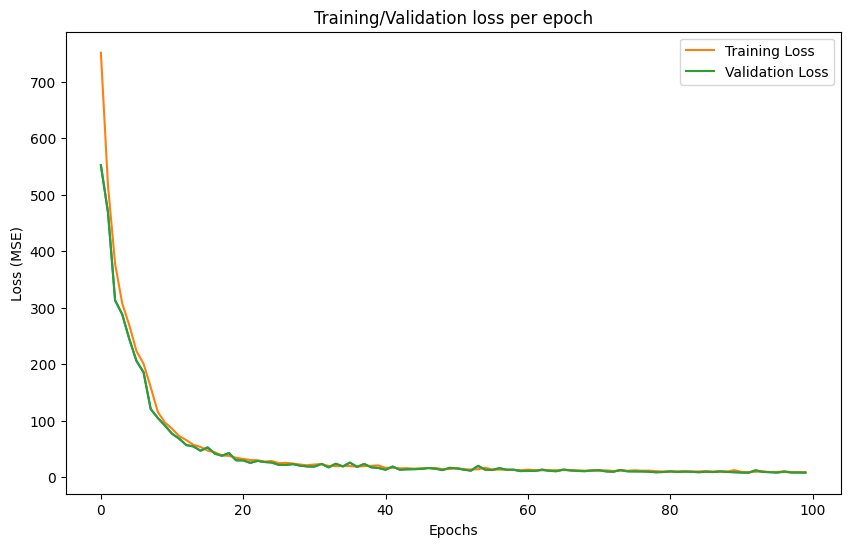

100


In [29]:
plt.figure(figsize = (10,6))
plt.plot(val_loss_arr)
plt.plot(range(len(train_loss_arr)), train_loss_arr, label='Training Loss')

# Plot validation loss
plt.plot(range(len(val_loss_arr)), val_loss_arr, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training/Validation loss per epoch')
plt.legend()
plt.show()
print(len(val_loss_arr))

In [34]:
import os
PATH = 'model_state_dict.pth'

torch.save(model.state_dict(),PATH)